In [21]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input/pothole-detection-dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

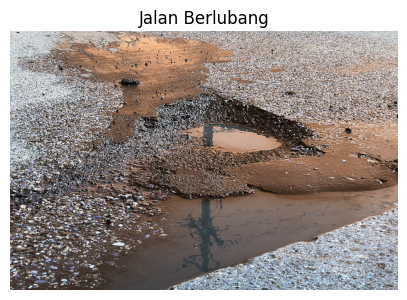

In [22]:
# Load the image
image_path = "/kaggle/input/pothole-detection-dataset/potholes/1.jpg"
image = cv2.imread(image_path)

# Display the image with a title
plt.figure(figsize = (5, 5))
plt.imshow(image)
plt.title("Jalan Berlubang") 
plt.axis("off") 
plt.show()

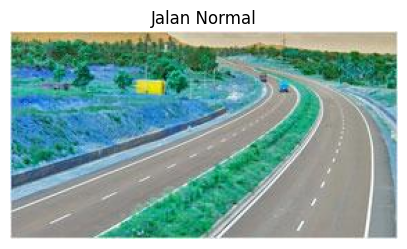

In [23]:
# Load the image
image_path = "/kaggle/input/pothole-detection-dataset/normal/1.jpg"
image = cv2.imread(image_path)

# Display the image with a title
plt.figure(figsize = (5, 5))
plt.imshow(image)
plt.title("Jalan Normal") 
plt.axis("off") 
plt.show()

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('/kaggle/input/pothole-detection-dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset="training")

Found 546 images belonging to 2 classes.


In [26]:
validation_generator = train_datagen.flow_from_directory(
    "/kaggle/input/pothole-detection-dataset", 
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 135 images belonging to 2 classes.


In [27]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [28]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
cnn.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
history = cnn.fit(x = training_set, validation_data = validation_generator, epochs = 80)

Epoch 1/80
18/18 [==============================] - 12s 637ms/step - loss: 0.6913 - accuracy: 0.4945 - val_loss: 0.6776 - val_accuracy: 0.5185
Epoch 2/80
18/18 [==============================] - 9s 511ms/step - loss: 0.6603 - accuracy: 0.7143 - val_loss: 0.6447 - val_accuracy: 0.6815
Epoch 3/80
18/18 [==============================] - 9s 510ms/step - loss: 0.6388 - accuracy: 0.6410 - val_loss: 0.6162 - val_accuracy: 0.6889
Epoch 4/80
18/18 [==============================] - 9s 485ms/step - loss: 0.5876 - accuracy: 0.7564 - val_loss: 0.5723 - val_accuracy: 0.7630
Epoch 5/80
18/18 [==============================] - 9s 503ms/step - loss: 0.5382 - accuracy: 0.8004 - val_loss: 0.5236 - val_accuracy: 0.7556
Epoch 6/80
18/18 [==============================] - 9s 514ms/step - loss: 0.4612 - accuracy: 0.8333 - val_loss: 0.4734 - val_accuracy: 0.7926
Epoch 7/80
18/18 [==============================] - 9s 504ms/step - loss: 0.4119 - accuracy: 0.8462 - val_loss: 0.4265 - val_accuracy: 0.8074
Epoch

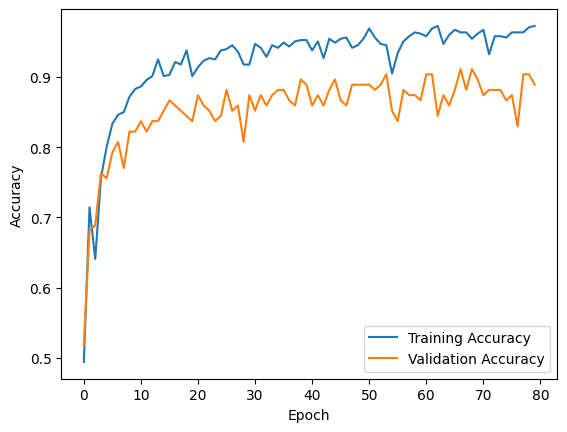

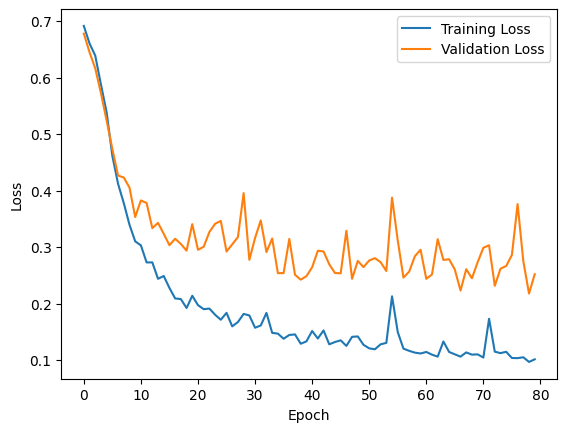

In [29]:
# Plot the accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# serialize weights to HDF5
cnn.save("cnn.h5")